# Car Resale Analysis and Prediction using different ML models

In [200]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [219]:
data_file = r'C:\\Users\\agana\\Desktop\\programs\\DAMT_Project\\CAR_DETAILS_FROM_CAR_DEKHO.xlsx'
sheet = 'in'

In [220]:
df = pd.read_excel(data_file,sheet)

In [221]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Data pre processing

In [223]:
print(df['owner'].unique())
print(df['transmission'].unique())
print(df['fuel'].unique())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [224]:
Ownerdict = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':0}
#transmission_dict ={0:'Manual',1:'Automatic'}
df['age']=int(datetime.datetime.now().date().strftime('%Y')) - df['year']
df['owner'] = df['owner'].map(Ownerdict)
df['selling_price']=df['selling_price']/100000
df.drop('year',axis=1,inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,0.60,70000,Petrol,Individual,Manual,1,16
1,Maruti Wagon R LXI Minor,1.35,50000,Petrol,Individual,Manual,1,16
2,Hyundai Verna 1.6 SX,6.00,100000,Diesel,Individual,Manual,1,11
3,Datsun RediGO T Option,2.50,46000,Petrol,Individual,Manual,1,6
4,Honda Amaze VX i-DTEC,4.50,141000,Diesel,Individual,Manual,2,9


In [225]:
df.drop('name',axis=1,inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,0.60,70000,Petrol,Individual,Manual,1,16
1,1.35,50000,Petrol,Individual,Manual,1,16
2,6.00,100000,Diesel,Individual,Manual,1,11
3,2.50,46000,Petrol,Individual,Manual,1,6
4,4.50,141000,Diesel,Individual,Manual,2,9


### Data visualization

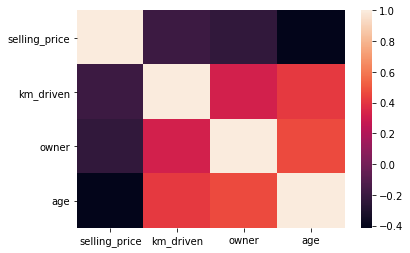

In [226]:
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

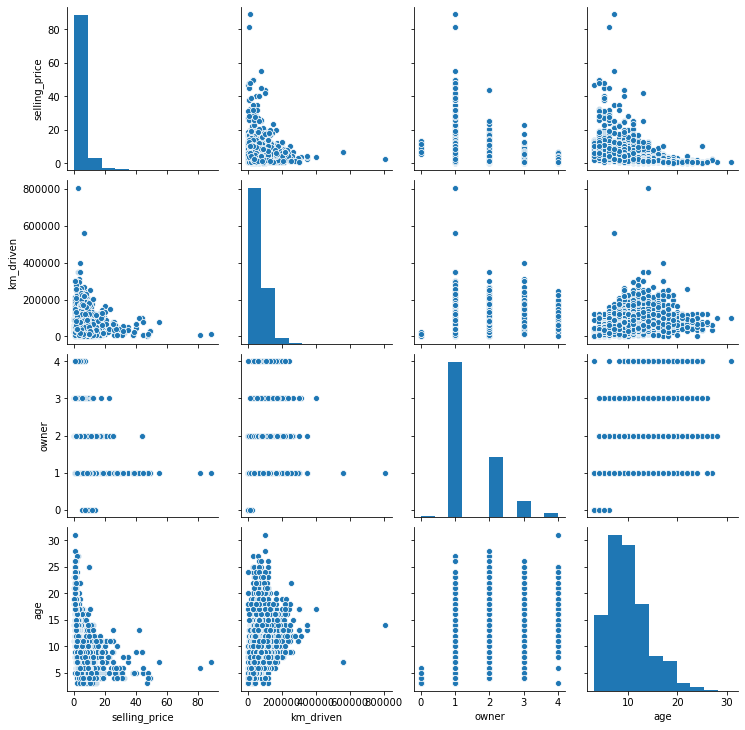

In [227]:
sns.pairplot(df,kind='scatter')
plt.show()

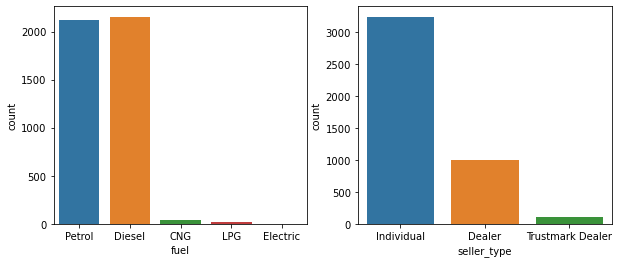

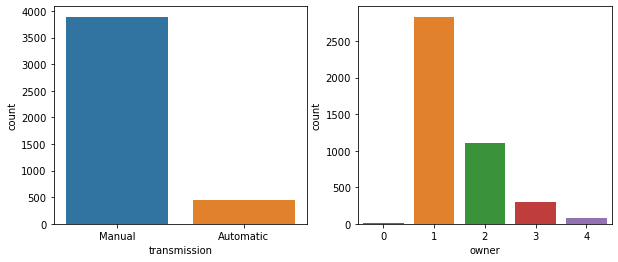

In [228]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()



In [229]:
df_main = pd.get_dummies(data=df,drop_first=True)
df_main.head()

,selling_price,km_driven,owner,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.60,70000,1,16,0,0,0,1,1,0,1
1,1.35,50000,1,16,0,0,0,1,1,0,1
2,6.00,100000,1,11,1,0,0,0,1,0,1
3,2.50,46000,1,6,0,0,0,1,1,0,1
4,4.50,141000,2,9,1,0,0,0,1,0,1


### Split Data to train and test

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
target = df_main['selling_price']
X = df_main.drop('selling_price',axis=1)

In [238]:
train_X , test_X , train_Y , test_Y = train_test_split(X,target,test_size=0.2,random_state=1)

In [240]:
print('training data attribute size - '+ str(train_X.shape))
print('training data target size - '+ str(train_Y.shape))
print('testing data attribute size - '+ str(test_X.shape))
print('testing data target size - '+ str(test_Y.shape))

training data attribute size - (3472, 10)
training data target size - (3472,)
testing data attribute size - (868, 10)
testing data target size - (868,)


## Linear Regression

In [246]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [317]:
def model_results(y_true,y_pred):
    
    try:
        explained_variance=metrics.explained_variance_score(y_true, y_pred)
        print('explained_variance: ', round(explained_variance,4))  
    except:
        pass
    
    try:
        mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
        print('Mean Absolute Error: ', round(mean_absolute_error,4))
    except:
        pass
    
    try:
        mse=metrics.mean_squared_error(y_true, y_pred)
        print('Root Mean Squared Error: ', round(np.sqrt(mse),4))
        print('Mean Squared Error: ', round(mse,4))
    except:
        pass
    
    try:
        mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
        print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    except:
        pass
    
    try:
        median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
        print('Median Absolute Error: ', round(median_absolute_error,4))
    except:
        pass
    
    try:
        r2=metrics.r2_score(y_true, y_pred)
        print('r2 Score: ', round(r2,4))
    except:
        pass
    sns.distplot(y_true-y_pred)

In [318]:
LiR_model = LinearRegression()
LiR_model.fit(train_X,train_Y)

LinearRegression()

explained_variance:  0.5016
Mean Absolute Error:  2.2041
Root Mean Squared Error:  3.8872
Mean Squared Error:  15.1101
Median Absolute Error:  1.4393
r2 Score:  0.5009


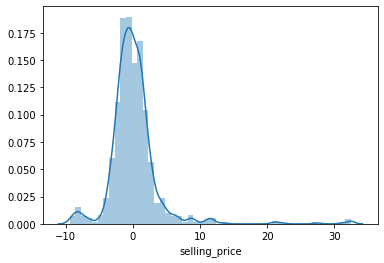

In [319]:
Lir_pred = LiR_model.predict(test_X)
model_results(test_Y,Lir_pred)

## Ridge Regression

In [320]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [321]:
rg = Ridge()
alpha = np.logspace(-3,3,num=14)
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))
rg.fit(train_X,train_Y)

Ridge()

explained_variance:  0.5015
Mean Absolute Error:  2.2033
Root Mean Squared Error:  3.8877
Mean Squared Error:  15.1143
Median Absolute Error:  1.4371
r2 Score:  0.5008


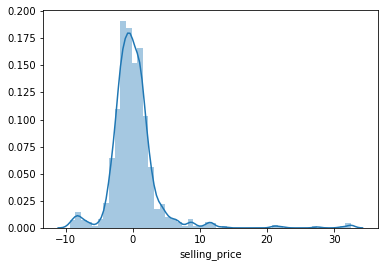

In [322]:
Ridge_pred = rg.predict(test_X)
model_results(test_Y,Ridge_pred)

## Random Forest Regression

In [269]:
from sklearn.ensemble import RandomForestRegressor

In [313]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]

# Number of features to consider at every split
max_features = max_features = ['sqrt',None]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 8)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [314]:
RF_parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [315]:
RF_model = RandomForestRegressor()
RF_random = RandomizedSearchCV(estimator = RF_model, param_distributions = RF_parameters, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=10, n_jobs=1)

In [316]:
RF_random.fit(train_X,train_Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.2s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=2, max_features=None, max_depth=40 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=2, max_features=None, max_depth=40, total=   1.2s
[CV] n_estimators=400, min_samples_split=15

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=1300, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['sqrt', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=2)

In [323]:
RF_random.best_params_

{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

explained_variance:  0.755
Mean Absolute Error:  1.5519
Root Mean Squared Error:  2.7256
Mean Squared Error:  7.4291
mean_squared_log_error:  0.1091
Median Absolute Error:  0.9216
r2 Score:  0.7546


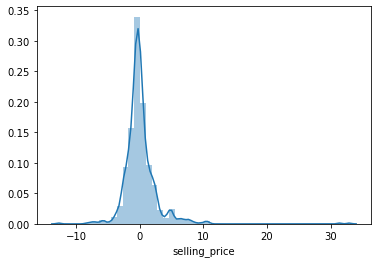

In [324]:
RF_pred = RF_random.predict(test_X)
model_results(test_Y,RF_pred)

## Descision Tree Regression

In [325]:
from sklearn.tree import DecisionTreeRegressor

In [329]:
DT_model = DecisionTreeRegressor(max_depth=6,random_state=10)
DT_model.fit(train_X,train_Y)

DecisionTreeRegressor(max_depth=6, random_state=10)

explained_variance:  0.7151
Mean Absolute Error:  1.6295
Root Mean Squared Error:  2.9398
Mean Squared Error:  8.6427
mean_squared_log_error:  0.1176
Median Absolute Error:  0.9644
r2 Score:  0.7145


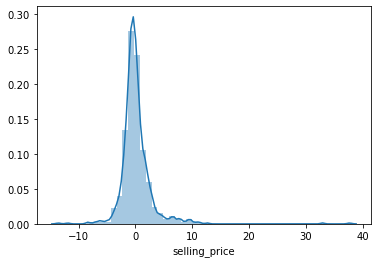

In [330]:
DT_pred = DT_model.predict(test_X)
model_results(test_Y,DT_pred)

## Gradient Boosting Regression

In [334]:
from sklearn.ensemble import GradientBoostingRegressor

In [335]:
# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

GB_parameters = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}
print(GB_parameters)

{'learning_rate': [0.001, 0.01, 0.1, 0.2], 'n_estimators': [500, 600, 700, 800, 900], 'max_depth': [4, 8], 'min_samples_split': [4, 6, 8], 'min_samples_leaf': [1, 2, 5, 7], 'max_features': ['auto', 'sqrt']}


In [338]:
GB_model = GradientBoostingRegressor()
GB_random = RandomizedSearchCV(estimator = GB_model, param_distributions = GB_parameters)
GB_random.fit(train_X,train_Y)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]})

In [339]:
GB_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 4,
 'learning_rate': 0.01}

explained_variance:  0.7438
Mean Absolute Error:  1.59
Root Mean Squared Error:  2.788
Mean Squared Error:  7.7731
mean_squared_log_error:  0.1142
Median Absolute Error:  0.9949
r2 Score:  0.7433


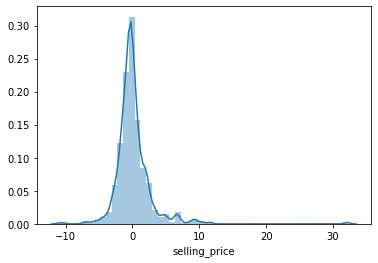

In [340]:
GB_pred = GB_random.predict(test_X)
model_results(test_Y,GB_pred)